In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    classification_report,
    recall_score,
    f1_score,
    confusion_matrix,
    mean_squared_error,
    roc_curve,
    auc,
)
from sklearn import metrics
from statsmodels.stats.proportion import proportions_ztest
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
# read dari link URL
url = 'https://raw.githubusercontent.com/alexchandra19/Proyek-ML-2023/main/Proyek%20ML/water_potability.csv'
data = pd.read_csv(url)
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.000000,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,0.000000,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,0.000000,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,0.000000,392.449580,19.903225,0.000000,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,0.000000,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,0.000000,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
# memuat deskripsi setiap kolom dataframe
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,6.019540,196.369496,22014.092526,7.122277,254.203468,426.205111,14.284970,63.112960,3.966786,0.390110
std,2.924207,32.879761,8768.570828,1.583085,146.765192,80.824064,3.308162,21.353531,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,0.000000,181.483754,2.200000,0.000000,1.450000,0.000000
25%,5.283146,176.850538,15666.690297,6.127421,240.722848,365.734414,12.065801,53.793688,3.439711,0.000000
50%,6.735249,196.967627,20927.833607,7.130299,318.660382,421.884968,14.218338,65.445962,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
# memuat korelasi setiap kolom dataframe dgn potability
data.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.032591,-0.051277,-0.010452,-0.010128,0.030879,0.034793,0.013248,-0.009120,0.020390
Hardness,0.032591,1.000000,-0.046899,-0.030054,-0.031065,-0.023915,0.003610,-0.005691,-0.014449,-0.013837
Solids,-0.051277,-0.046899,1.000000,-0.070148,-0.026671,0.013831,0.010242,-0.023065,0.019546,0.033743
Chloramines,-0.010452,-0.030054,-0.070148,1.000000,0.002513,-0.020486,-0.012653,0.014974,0.002363,0.023779
Sulfate,-0.010128,-0.031065,-0.026671,0.002513,1.000000,-0.017943,0.029329,-0.011642,0.000244,0.011542
Conductivity,0.030879,-0.023915,0.013831,-0.020486,-0.017943,1.000000,0.020966,0.016318,0.005798,-0.008128
Organic_carbon,0.034793,0.003610,0.010242,-0.012653,0.029329,0.020966,1.000000,-0.013381,-0.027308,-0.030001
Trihalomethanes,0.013248,-0.005691,-0.023065,0.014974,-0.011642,0.016318,-0.013381,1.000000,-0.019066,0.021094
Turbidity,-0.009120,-0.014449,0.019546,0.002363,0.000244,0.005798,-0.027308,-0.019066,1.000000,0.001581
Potability,0.020390,-0.013837,0.033743,0.023779,0.011542,-0.008128,-0.030001,0.021094,0.001581,1.000000


Data Cleaning & Preprocessing

In [ ]:
# Menghitung jumlah data kosong pada setiap kolom
data.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
# replace missing values with 0
data.fillna(0, inplace=True)
# Step 3: Save the updated DataFrame back to the same file
data.to_csv(url, index=False)  # Set index to False to avoid writing the index column

In [ ]:
# menghitung jumlah data kosong pada setiap kolom
data.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
print("Sudah tidak ada data kosong")

Sudah tidak ada data kosong


In [ ]:
# print dataset yang telah diupdate
print(data)

            ph    Hardness        Solids  Chloramines     Sulfate  \
0     0.000000  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246    0.000000   
2     8.099124  224.236259  19909.541732     9.275884    0.000000   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362    0.000000   
3273  9.419510  175.762646  33155.578218     7.350233    0.000000   
3274  5.126763  230.603758  11983.869376     6.303357    0.000000   
3275  7.874671  195.102299  17404.177061     7.509306    0.000000   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.88535

p-value

In [ ]:
# predictor variables (X) & response variable (y) 
X = data.drop(['Potability'], axis=1)
y = (data['Potability'] == 1)  # 1 = potable

In [ ]:
# Generate a synthetic dataset (replace this with your own data)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

#split data into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

glm= sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = glm.fit()

# Predict probabilities for the testing data
probs = results.predict(exog=X_test)

# Print the summary of the logistic regression model
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  700
Model:                            GLM   Df Residuals:                      682
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -200.11
Date:                Sun, 22 Oct 2023   Deviance:                       400.21
Time:                        12:05:32   Pearson chi2:                 1.25e+03
No. Iterations:                   100   Pseudo R-squ. (CS):             0.5572
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1268      0.126      1.008      0.3

MinMax Scalling (Normalization)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Logistic Regression Model

Confusion Matrix Logistic Regression Train

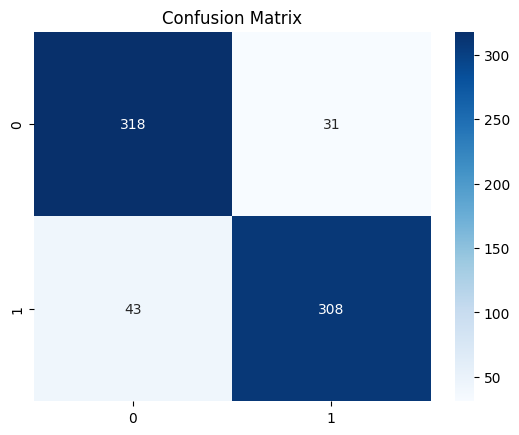

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the training data using the LDA model
y_pred = logreg.predict(X_train)

# Create a confusion matrix with labeled classes
confusion = confusion_matrix(y_train, y_pred)

# Get the unique class labels from y_train
class_labels = sorted(set(y_train))

# Plot the confusion matrix with values
sns.heatmap(pd.DataFrame(confusion, index=class_labels, columns=class_labels), annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.show()


Confusion Matrix Logistic Regression Test

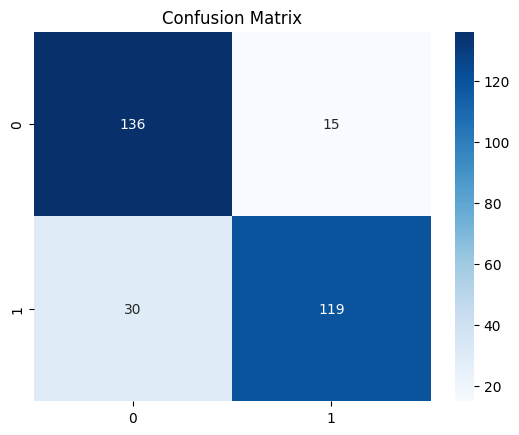

In [ ]:
# Make predictions on the test data using the LDA model
y_pred = logreg.predict(X_test)

# Create a confusion matrix with labeled classes
confusion = confusion_matrix(y_test, y_pred)

# Get the unique class labels from y_test
class_labels = sorted(set(y_test))

# Plot the confusion matrix with values
sns.heatmap(pd.DataFrame(confusion, index=class_labels, columns=class_labels), annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.show()


Hypothesis testing

In [ ]:
contingency_table = pd.crosstab(data['Potability'], columns='count')

# Extract the counts for potable (1) and non-potable (0) water
potable_count = contingency_table.loc[1, 'count']
non_potable_count = contingency_table.loc[0, 'count']

# Perform a two-sample proportion test
stat, p_value = proportions_ztest([potable_count, non_potable_count], [potable_count + non_potable_count], alternative='two-sided')

# Define the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha to determine statistical significance
print("P-value = ", p_value)
if p_value < alpha:
    print(f"Tolak H0. The proportions of potable and non-potable water are significantly different")
else:
    print(f"Terima H0. There is no significant difference in the proportions of potable and non-potable water")

P-value =  8.450463443404447e-71
Tolak H0. The proportions of potable and non-potable water are significantly different


K-Fold Logistic

In [ ]:
# Number of folds for cross-validation
k = 10  # You can adjust the number of folds

# Initialize variables to store accuracy and MSE results
train_accuracies = []
test_accuracies = []
train_mses = []
test_mses = []

# Perform k-fold cross-validation on the training data
kf = KFold(n_splits=k, shuffle=True, random_state=1)

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Fit the LDA model on the training fold
    logreg.fit(X_train_fold, y_train_fold)

    # Evaluate the LDA model on the training fold
    train_pred = logreg.predict(X_train_fold)
    train_accuracy = accuracy_score(y_train_fold, train_pred)
    train_accuracies.append(train_accuracy)

    # Calculate and store the MSE for training fold
    train_mse = mean_squared_error(y_train_fold, train_pred)
    train_mses.append(train_mse)

    # Evaluate the LDA model on the test data
    test_pred = logreg.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_accuracies.append(test_accuracy)

    # Calculate and store the MSE for test data
    test_mse = mean_squared_error(y_test, test_pred)
    test_mses.append(test_mse)

# Calculate and display average accuracy and MSE for training and test data
avg_train_accuracy = sum(train_accuracies) / len(train_accuracies)
avg_test_accuracy = sum(test_accuracies) / len(test_accuracies)
avg_train_mse = sum(train_mses) / len(train_mses)
avg_test_mse = sum(test_mses) / len(test_mses)

print(f"Average Training Accuracy: {avg_train_accuracy:.2f}")
print(f"Average Test Accuracy: {avg_test_accuracy:.2f}")
print(f"Average Training MSE: {avg_train_mse:.2f}")
print(f"Average Test MSE: {avg_test_mse:.2f}")

Average Training Accuracy: 0.89
Average Test Accuracy: 0.84
Average Training MSE: 0.11
Average Test MSE: 0.16


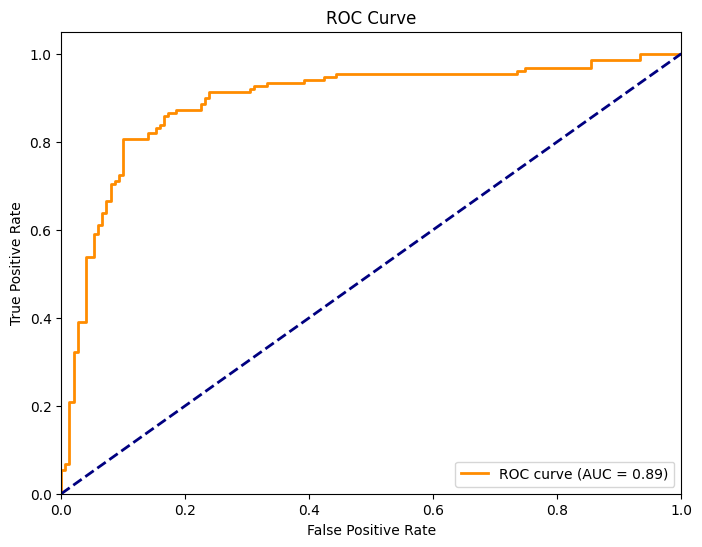

In [ ]:
# Initialize the model (Logistic Regression in this example)
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict probabilities on the test data
y_score = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_score)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

LDA

In [ ]:
# Initialize the LDA model
lda = LinearDiscriminantAnalysis()

# Fit the LDA model on the training data
lda.fit(X_train, y_train)

# Perform dimensionality reduction on both the training and test data
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

In [ ]:
lda.means_

array([[0.4541743 , 0.61376764, 0.42128898, 0.53157285, 0.48053106,
        0.40558084, 0.47221467, 0.51425601, 0.57614389, 0.47142882,
        0.51550258, 0.39738343, 0.48025171, 0.48570063, 0.48157044,
        0.56794344, 0.52995629, 0.45925265, 0.60170796, 0.53574178],
       [0.46384314, 0.46113338, 0.4295478 , 0.51836563, 0.49393304,
        0.65294829, 0.48421105, 0.50577615, 0.57257406, 0.47382756,
        0.5291987 , 0.41517763, 0.46690306, 0.48799792, 0.48512268,
        0.56101704, 0.52922872, 0.46965845, 0.39845825, 0.54312637]])

In [ ]:
lda.priors_

array([0.49857143, 0.50142857])

Accuracy, Precision, Recall, F-1 Score LDA Train

In [ ]:
# Fit the model on the training data
lda.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lda.predict(X_train)

# Calculate and print accuracy
accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate and print precision
precision = precision_score(y_train, y_pred)
print(f'Precision: {precision:.2f}')

# Calculate and print recall
recall = recall_score(y_train, y_pred)
print(f'Recall: {recall:.2f}')

# Calculate and print F1-score
f1 = f1_score(y_train, y_pred)
print(f'F1-Score: {f1:.2f}')

# Generate a classification report
class_report = classification_report(y_train, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.89
Precision: 0.90
Recall: 0.88
F1-Score: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       349
           1       0.90      0.88      0.89       351

    accuracy                           0.89       700
   macro avg       0.89      0.89      0.89       700
weighted avg       0.89      0.89      0.89       700



Accuracy, Precision, Recall, F-1 Score LDA Test

In [ ]:
# Fit the model on the training data
lda.fit(X_test, y_test)

# Make predictions on the test data
y_pred = lda.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate and print precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

# Calculate and print recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

# Calculate and print F1-score
f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {f1:.2f}')

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.84
Precision: 0.87
Recall: 0.80
F1-Score: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       151
           1       0.87      0.80      0.83       149

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



Confusion Matrix LDA Train

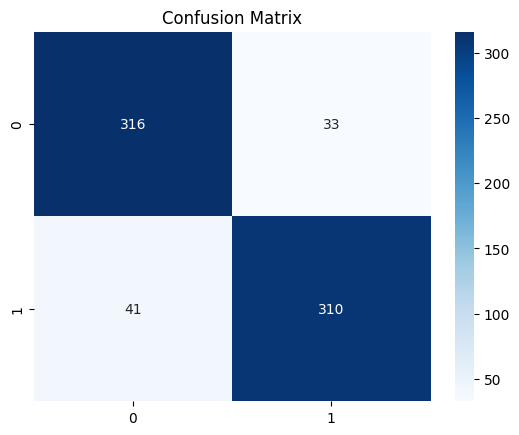

In [ ]:
lda.fit(X_train, y_train)

# Make predictions on the training data using the LDA model
y_pred = lda.predict(X_train)

# Create a confusion matrix with labeled classes
confusion = confusion_matrix(y_train, y_pred)

# Get the unique class labels from y_train
class_labels = sorted(set(y_train))

# Plot the confusion matrix with values
sns.heatmap(pd.DataFrame(confusion, index=class_labels, columns=class_labels), annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.show()


Confusion Matrix LDA Test

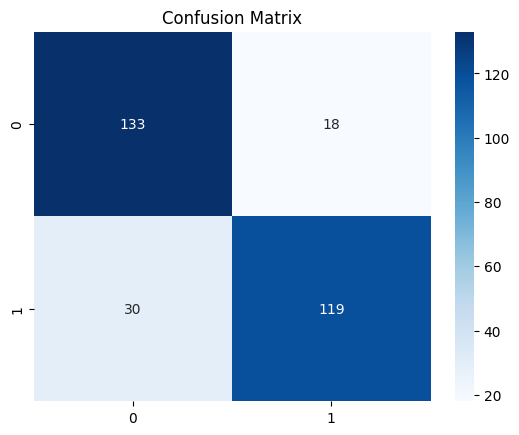

In [ ]:
lda.fit(X_test, y_test)

# Make predictions on the test data using the LDA model
y_pred = lda.predict(X_test)

# Create a confusion matrix with labeled classes
confusion = confusion_matrix(y_test, y_pred)

# Get the unique class labels from y_test
class_labels = sorted(set(y_test))

# Plot the confusion matrix with values
sns.heatmap(pd.DataFrame(confusion, index=class_labels, columns=class_labels), annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.show()


K-Fold LDA

In [ ]:
# Number of folds for cross-validation
k = 10  # You can adjust the number of folds

# Initialize variables to store accuracy and MSE results
train_accuracies = []
test_accuracies = []
train_mses = []
test_mses = []

# Perform k-fold cross-validation on the training data
kf = KFold(n_splits=k, shuffle=True, random_state=1)

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Fit the LDA model on the training fold
    lda.fit(X_train_fold, y_train_fold)

    # Evaluate the LDA model on the training fold
    train_pred = lda.predict(X_train_fold)
    train_accuracy = accuracy_score(y_train_fold, train_pred)
    train_accuracies.append(train_accuracy)

    # Calculate and store the MSE for training fold
    train_mse = mean_squared_error(y_train_fold, train_pred)
    train_mses.append(train_mse)

    # Evaluate the LDA model on the test data
    test_pred = lda.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_accuracies.append(test_accuracy)

    # Calculate and store the MSE for test data
    test_mse = mean_squared_error(y_test, test_pred)
    test_mses.append(test_mse)

# Calculate and display average accuracy and MSE for training and test data
avg_train_accuracy = sum(train_accuracies) / len(train_accuracies)
avg_test_accuracy = sum(test_accuracies) / len(test_accuracies)
avg_train_mse = sum(train_mses) / len(train_mses)
avg_test_mse = sum(test_mses) / len(test_mses)

print(f"Average Training Accuracy: {avg_train_accuracy:.2f}")
print(f"Average Test Accuracy: {avg_test_accuracy:.2f}")
print(f"Average Training MSE: {avg_train_mse:.2f}")
print(f"Average Test MSE: {avg_test_mse:.2f}")

Average Training Accuracy: 0.90
Average Test Accuracy: 0.83
Average Training MSE: 0.10
Average Test MSE: 0.17


QDA

Accuracy, Precision, Recall, F-1 Score QDA Train

In [ ]:
# Initialize the LDA model
qda = QuadraticDiscriminantAnalysis()

# Fit the model on the training data
qda.fit(X_train, y_train)

# Make predictions on the test data
y_pred = qda.predict(X_train)

# Calculate and print accuracy
accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate and print precision
precision = precision_score(y_train, y_pred)
print(f'Precision: {precision:.2f}')

# Calculate and print recall
recall = recall_score(y_train, y_pred)
print(f'Recall: {recall:.2f}')

# Calculate and print F1-score
f1 = f1_score(y_train, y_pred)
print(f'F1-Score: {f1:.2f}')

# Generate a classification report
class_report = classification_report(y_train, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.85
Precision: 0.86
Recall: 0.85
F1-Score: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       349
           1       0.86      0.85      0.85       351

    accuracy                           0.85       700
   macro avg       0.85      0.85      0.85       700
weighted avg       0.85      0.85      0.85       700



C:\Users\Evelyn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy, Precision, Recall, F-1 Score QDA Test

In [ ]:
# Fit the model on the training data
qda.fit(X_test, y_test)

# Make predictions on the test data
y_pred = qda.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate and print precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

# Calculate and print recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

# Calculate and print F1-score
f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {f1:.2f}')

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.83
Precision: 0.87
Recall: 0.77
F1-Score: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       151
           1       0.87      0.77      0.81       149

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



C:\Users\Evelyn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Confusion Matrix QDA Train

C:\Users\Evelyn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


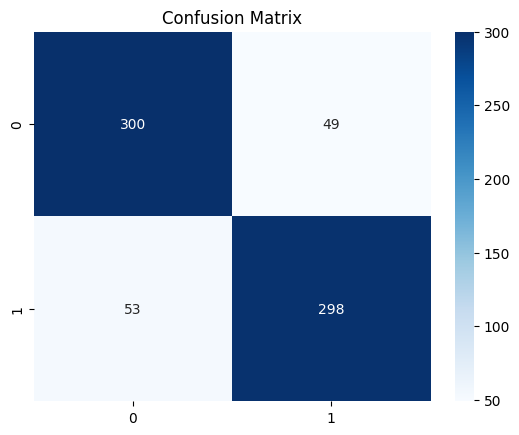

In [ ]:
qda.fit(X_train, y_train)

# Make predictions on the training data using the LDA model
y_pred = qda.predict(X_train)

# Create a confusion matrix with labeled classes
confusion = confusion_matrix(y_train, y_pred)

# Get the unique class labels from y_train
class_labels = sorted(set(y_train))

# Plot the confusion matrix with values
sns.heatmap(pd.DataFrame(confusion, index=class_labels, columns=class_labels), annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.show()


Confusion Matrix QDA Test

C:\Users\Evelyn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


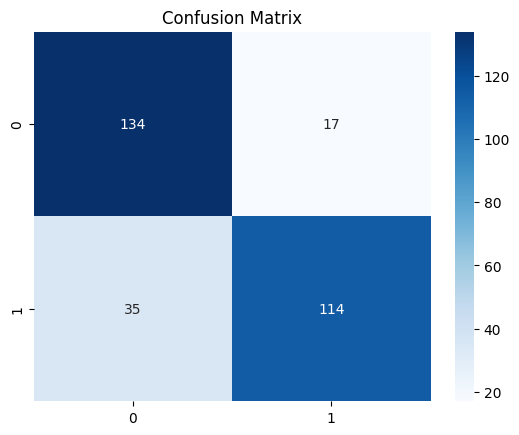

In [ ]:
qda.fit(X_test, y_test)

# Make predictions on the test data using the LDA model
y_pred = qda.predict(X_test)

# Create a confusion matrix with labeled classes
confusion = confusion_matrix(y_test, y_pred)

# Get the unique class labels from y_test
class_labels = sorted(set(y_test))

# Plot the confusion matrix with values
sns.heatmap(pd.DataFrame(confusion, index=class_labels, columns=class_labels), annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.show()


K-Fold QDA

In [ ]:
# Number of folds for cross-validation
k = 10  # You can adjust the number of folds


# Initialize variables to store accuracy and MSE results
train_accuracies = []
test_accuracies = []
train_mses = []
test_mses = []

# Perform k-fold cross-validation on the training data
kf = KFold(n_splits=k, shuffle=True, random_state=1)

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Fit the LDA model on the training fold
    qda.fit(X_train_fold, y_train_fold)

    # Evaluate the LDA model on the training fold
    train_pred = qda.predict(X_train_fold)
    train_accuracy = accuracy_score(y_train_fold, train_pred)
    train_accuracies.append(train_accuracy)

    # Calculate and store the MSE for training fold
    train_mse = mean_squared_error(y_train_fold, train_pred)
    train_mses.append(train_mse)

    # Evaluate the LDA model on the test data
    test_pred = qda.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_accuracies.append(test_accuracy)

    # Calculate and store the MSE for test data
    test_mse = mean_squared_error(y_test, test_pred)
    test_mses.append(test_mse)

# Calculate and display average accuracy and MSE for training and test data
avg_train_accuracy = sum(train_accuracies) / len(train_accuracies)
avg_test_accuracy = sum(test_accuracies) / len(test_accuracies)
avg_train_mse = sum(train_mses) / len(train_mses)
avg_test_mse = sum(test_mses) / len(test_mses)

print(f"Average Training Accuracy: {avg_train_accuracy:.2f}")
print(f"Average Test Accuracy: {avg_test_accuracy:.2f}")
print(f"Average Training MSE: {avg_train_mse:.2f}")
print(f"Average Test MSE: {avg_test_mse:.2f}")


Average Training Accuracy: 0.82
Average Test Accuracy: 0.73
Average Training MSE: 0.18
Average Test MSE: 0.27


C:\Users\Evelyn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Evelyn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Evelyn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Evelyn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.

Naive Bayes

Accuracy, Precision, Recall, F-1 Score Naive Bayes Train

In [ ]:
# Initialize the Gaussian Naive Bayes model
nb = GaussianNB()

# Fit the model on the training data
nb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb.predict(X_train)

# Calculate and print accuracy
accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate and print precision
precision = precision_score(y_train, y_pred)
print(f'Precision: {precision:.2f}')

# Calculate and print recall
recall = recall_score(y_train, y_pred)
print(f'Recall: {recall:.2f}')

# Calculate and print F1-score
f1 = f1_score(y_train, y_pred)
print(f'F1-Score: {f1:.2f}')

# Generate a classification report
class_report = classification_report(y_train, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.86
Precision: 0.89
Recall: 0.83
F1-Score: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       349
           1       0.89      0.83      0.86       351

    accuracy                           0.86       700
   macro avg       0.87      0.86      0.86       700
weighted avg       0.87      0.86      0.86       700



Accuracy, Precision, Recall, F-1 Score Naive Bayes Test

In [ ]:
# Fit the model on the training data
nb.fit(X_test, y_test)

# Make predictions on the test data
y_pred = nb.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate and print precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

# Calculate and print recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

# Calculate and print F1-score
f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {f1:.2f}')

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.81
Precision: 0.86
Recall: 0.74
F1-Score: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.88      0.82       151
           1       0.86      0.74      0.79       149

    accuracy                           0.81       300
   macro avg       0.82      0.81      0.81       300
weighted avg       0.82      0.81      0.81       300



Confusion Matrix Naive Bayes Train

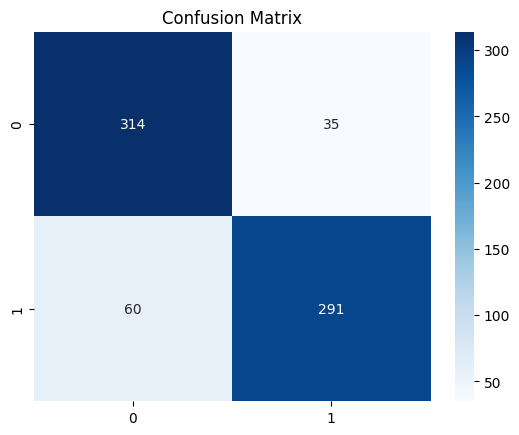

In [ ]:
nb.fit(X_train, y_train)

# Make predictions on the training data using the LDA model
y_pred = nb.predict(X_train)

# Create a confusion matrix with labeled classes
confusion = confusion_matrix(y_train, y_pred)

# Get the unique class labels from y_train
class_labels = sorted(set(y_train))

# Plot the confusion matrix with values
sns.heatmap(pd.DataFrame(confusion, index=class_labels, columns=class_labels), annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.show()


Confusion Matrix Naive Bayes Test

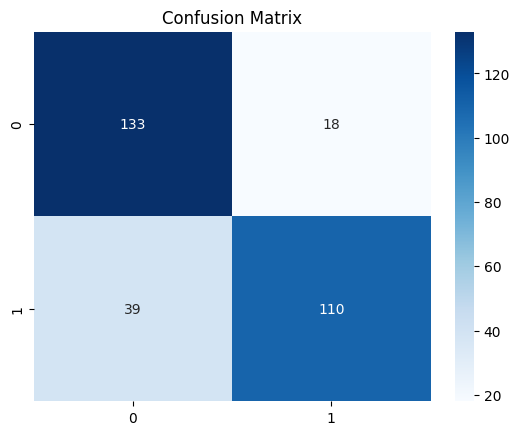

In [ ]:
nb.fit(X_test, y_test)

# Make predictions on the test data using the LDA model
y_pred = nb.predict(X_test)

# Create a confusion matrix with labeled classes
confusion = confusion_matrix(y_test, y_pred)

# Get the unique class labels from y_test
class_labels = sorted(set(y_test))

# Plot the confusion matrix with values
sns.heatmap(pd.DataFrame(confusion, index=class_labels, columns=class_labels), annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.show()


K-Fold Naive Bayes

In [ ]:
# Number of folds for cross-validation
k = 10  # You can adjust the number of folds

# Initialize variables to store accuracy and MSE results
train_accuracies = []
test_accuracies = []
train_mses = []
test_mses = []

# Perform k-fold cross-validation on the training data
kf = KFold(n_splits=k, shuffle=True, random_state=1)

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Fit the LDA model on the training fold
    nb.fit(X_train_fold, y_train_fold)

    # Evaluate the LDA model on the training fold
    train_pred = nb.predict(X_train_fold)
    train_accuracy = accuracy_score(y_train_fold, train_pred)
    train_accuracies.append(train_accuracy)

    # Calculate and store the MSE for training fold
    train_mse = mean_squared_error(y_train_fold, train_pred)
    train_mses.append(train_mse)

    # Evaluate the LDA model on the test data
    test_pred = nb.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_accuracies.append(test_accuracy)

    # Calculate and store the MSE for test data
    test_mse = mean_squared_error(y_test, test_pred)
    test_mses.append(test_mse)

# Calculate and display average accuracy and MSE for training and test data
avg_train_accuracy = sum(train_accuracies) / len(train_accuracies)
avg_test_accuracy = sum(test_accuracies) / len(test_accuracies)
avg_train_mse = sum(train_mses) / len(train_mses)
avg_test_mse = sum(test_mses) / len(test_mses)

print(f"Average Training Accuracy: {avg_train_accuracy:.2f}")
print(f"Average Test Accuracy: {avg_test_accuracy:.2f}")
print(f"Average Training MSE: {avg_train_mse:.2f}")
print(f"Average Test MSE: {avg_test_mse:.2f}")


Average Training Accuracy: 0.86
Average Test Accuracy: 0.81
Average Training MSE: 0.14
Average Test MSE: 0.19


ROC AUC Curve of Logistic, LDA, QDA, Naive Bayes

C:\Users\Evelyn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


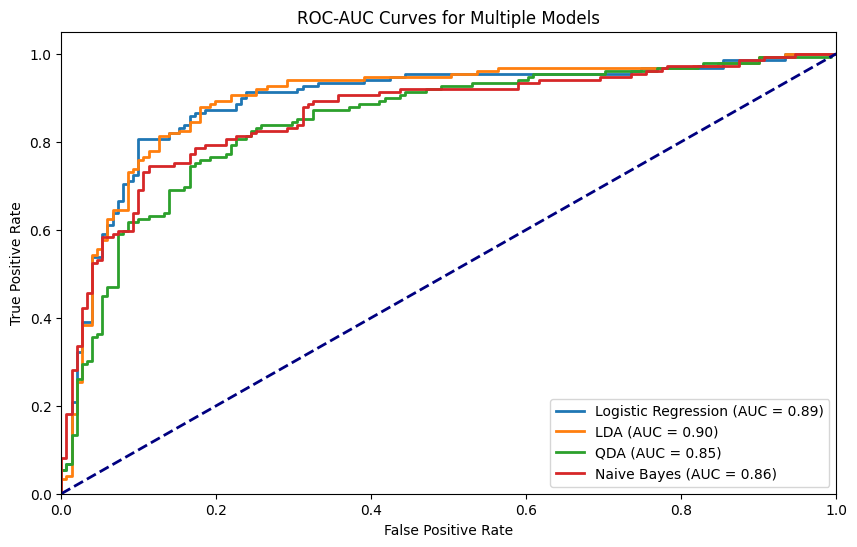

In [ ]:
# Initialize models
models = [
    ("Logistic Regression", LogisticRegression()),
    ("LDA", LinearDiscriminantAnalysis()),
    ("QDA", QuadraticDiscriminantAnalysis()),
    ("Naive Bayes", GaussianNB())
]

# Initialize dictionaries to store ROC data
roc_data = {}

# Fit each model, calculate ROC data, and store it
for model_name, model in models:
    model.fit(X_train, y_train)
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    roc_data[model_name] = (fpr, tpr, roc_auc)

# Plot ROC curves for each model
plt.figure(figsize=(10, 6))
for model_name, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curves for Multiple Models')
plt.legend(loc='lower right')
plt.show()